In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from datetime import datetime, timedelta

from mpl_toolkits.basemap import Basemap

from matplotlib import animation
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## Meta

Working with meta data only.

In [2]:
meta = pd.read_csv('meta_all.csv')
meta

,Provider,Name,Longitude,Latitude,Elevation,HN_year_start,HN_year_end,HS_year_start,HS_year_end
0,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0
1,AT_HZB,Ach_Burghausen,12.846389,48.148889,473.0,1990.0,2016.0,1990.0,2016.0
2,AT_HZB,Admont,14.457222,47.567778,700.0,1970.0,2016.0,1970.0,2016.0
3,AT_HZB,Afritz,13.795556,46.727500,715.0,1970.0,2016.0,1970.0,2016.0
4,AT_HZB,Alberschwende,9.849167,47.458333,717.0,1982.0,2016.0,1982.0,2016.0
...,...,...,...,...,...,...,...,...,...
2974,SI_ARSO,Zgornje_loke_pri_blagovici,14.787123,46.173105,394.0,1961.0,2019.0,1961.0,2019.0
2975,SI_ARSO,Zgornji_razbor,15.000000,46.450000,864.0,NaN,NaN,1961.0,2015.0
2976,SI_ARSO,Zgornji_tuhinj_golice,14.789246,46.224363,665.0,NaN,NaN,1961.0,2019.0
2977,SI_ARSO,Ziri,14.124498,46.048453,498.0,1961.0,2019.0,1961.0,2019.0


In [3]:
meta.describe()

,Longitude,Latitude,Elevation,HN_year_start,HN_year_end,HS_year_start,HS_year_end
count,2979.000000,2979.000000,2979.000000,2839.000000,2839.000000,2960.000000,2960.000000
mean,10.643111,47.167628,835.436039,1974.040507,2011.125749,1971.951351,2011.173986
std,2.975389,1.135784,533.490340,19.253276,12.149992,20.232169,12.269661
min,3.959833,43.109500,2.000000,1787.000000,1951.000000,1879.000000,1944.000000
25%,8.105136,46.428251,453.000000,1961.000000,2005.000000,1961.000000,2005.000000
50%,10.323000,47.317068,676.000000,1972.000000,2016.000000,1970.000000,2016.000000
75%,13.017100,48.044811,1090.000000,1983.000000,2019.000000,1981.000000,2019.000000
max,17.101111,48.999000,3200.000000,2019.000000,2020.000000,2019.000000,2020.000000


Get lowest and highest stations.  Observe that the highest station exists only in the meta file and there is no data associated to it in the dataset.

In [4]:
min_elevation_id, max_elevation_id = meta['Elevation'].idxmin(), meta['Elevation'].idxmax()
min_elevation_id, max_elevation_id

(2262, 2361)

In [5]:
meta.iloc[min_elevation_id], meta.iloc[max_elevation_id]

(Provider         FR_METEOFRANCE
 Name                     Cannes
 Longitude              6.950333
 Latitude              43.553833
 Elevation                   2.0
 HN_year_start               NaN
 HN_year_end                 NaN
 HS_year_start            1960.0
 HS_year_end              2009.0
 Name: 2262, dtype: object,
 Provider             FR_METEOFRANCE
 Name             Les_2_alpes_jandri
 Longitude                  6.202833
 Latitude                    44.9915
 Elevation                    3200.0
 HN_year_start                2002.0
 HN_year_end                  2019.0
 HS_year_start                2002.0
 HS_year_end                  2019.0
 Name: 2361, dtype: object)

In [6]:
min_elevation_name, max_elevation_name = meta.iloc[min_elevation_id]['Name'], meta.iloc[max_elevation_id]['Name']
min_elevation_name, max_elevation_name

('Cannes', 'Les_2_alpes_jandri')

In [7]:
meta['Provider'].drop_duplicates()
meta.iloc[max_elevation_id]

Provider             FR_METEOFRANCE
Name             Les_2_alpes_jandri
Longitude                  6.202833
Latitude                    44.9915
Elevation                    3200.0
HN_year_start                2002.0
HN_year_end                  2019.0
HS_year_start                2002.0
HS_year_end                  2019.0
Name: 2361, dtype: object

In [8]:
meta.groupby(['Provider']).count()['Name']

Provider
AT_HZB            653
CH_METEOSWISS     506
CH_SLF             96
DE_DWD            965
FR_METEOFRANCE    286
IT_BZ              64
IT_FVG             30
IT_LOMBARDIA       11
IT_PIEMONTE        34
IT_SMI             14
IT_TN              52
IT_TN_TUM           5
IT_VDA_AIBM        57
IT_VDA_CF          17
IT_VENETO          11
SI_ARSO           178
Name: Name, dtype: int64

Plot locations of all stations in the meta file.

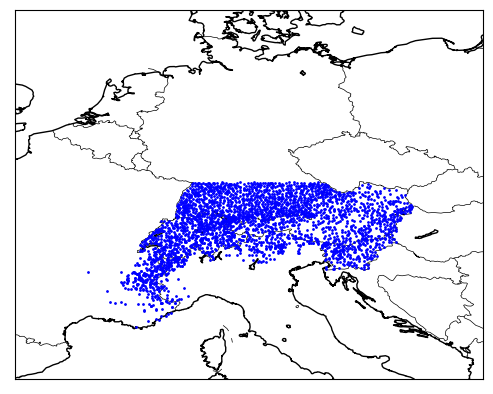

In [9]:
map = Basemap(resolution='i', llcrnrlon=1.,llcrnrlat=41.,urcrnrlon=20.,urcrnrlat=56.)

map.drawcoastlines()
map.drawcountries()
map.drawstates()

x, y = map(meta['Longitude'], meta['Latitude'])
map.plot(x, y, 'bo', markersize=1)

# Show the map
plt.show()

plt.close()


## Overall Monthly Data

Generate a combined object with all monthly data.

In [10]:
at_monthly = pd.read_csv('data_monthly_AT_HZB.csv')
ch_meteoswiss_monthly = pd.read_csv('data_monthly_CH_METEOSWISS.csv')
ch_slf_monthly = pd.read_csv('data_monthly_CH_SLF.csv')
de_monthly = pd.read_csv('data_monthly_DE_DWD.csv')
fr_monthly = pd.read_csv('data_monthly_FR_METEOFRANCE.csv')
it_monthly_bz = pd.read_csv('data_monthly_IT_BZ.csv')
it_monthly_fvg = pd.read_csv('data_monthly_IT_FVG.csv')
it_monthly_lombardia = pd.read_csv('data_monthly_IT_LOMBARDIA.csv')
it_monthly_tn = pd.read_csv('data_monthly_IT_TN.csv')
it_monthly_vda_cf = pd.read_csv('data_monthly_IT_VDA_CF.csv')
it_monthly_veneto = pd.read_csv('data_monthly_IT_VENETO.csv')
si_monthly = pd.read_csv('data_monthly_SI_ARSO.csv')

monthly = pd.concat([at_monthly, ch_meteoswiss_monthly, ch_slf_monthly, de_monthly, fr_monthly, it_monthly_bz, it_monthly_fvg, it_monthly_lombardia, it_monthly_tn, it_monthly_vda_cf, it_monthly_veneto, si_monthly])

In [11]:
monthly

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
0,Absdorf,1965,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Absdorf,1965,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Absdorf,1965,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Absdorf,1965,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Absdorf,1965,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123823,Zusem,2019,8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123824,Zusem,2019,9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123825,Zusem,2019,10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123826,Zusem,2019,11,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Merge with metadata
monthly = meta.merge(monthly, how='inner', on='Name')

In [13]:
monthly

,Provider,Name,Longitude,Latitude,Elevation,HN_year_start,HN_year_end,HS_year_start,HS_year_end,year,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
0,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519447,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519448,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519449,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1519450,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# Add date column
monthly = monthly.assign(date=pd.to_datetime([f'{y}-{m}' for y, m in zip(monthly.year, monthly.month)]).values)
monthly

,Provider,Name,Longitude,Latitude,Elevation,HN_year_start,HN_year_end,HS_year_start,HS_year_end,year,...,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill,date
0,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965-01-01
1,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965-02-01
2,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965-03-01
3,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1965-04-01
4,AT_HZB,Absdorf,15.976667,48.401667,182.0,1970.0,2016.0,1970.0,2016.0,1965,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1965-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1519447,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-08-01
1519448,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-09-01
1519449,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-10-01
1519450,SI_ARSO,Zusem,15.495033,46.150968,623.0,1961.0,2019.0,1961.0,2019.0,2019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2019-11-01


Get all stations for which we have data by name.

In [15]:
available_stations = monthly.Name.drop_duplicates()
available_stations

0                             Absdorf
660                    Ach_Burghausen
1080                           Admont
1740                           Afritz
2412                    Alberschwende
                      ...            
1515888    Zgornje_loke_pri_blagovici
1516608                Zgornji_razbor
1517316         Zgornji_tuhinj_golice
1518036                          Ziri
1518744                         Zusem
Name: Name, Length: 2840, dtype: object

In [16]:
monthly[['Name', 'Provider']].drop_duplicates('Name').groupby(['Provider']).count()

,Name
Provider,
AT_HZB,653
CH_METEOSWISS,503
CH_SLF,96
DE_DWD,965
FR_METEOFRANCE,267
IT_BZ,64
IT_FVG,30
IT_LOMBARDIA,11
IT_TN,45


Plot all stations that have data.

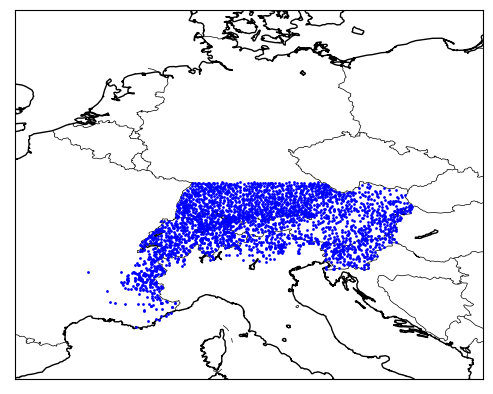

In [17]:
locations = monthly[['Longitude', 'Latitude']].drop_duplicates()

map = Basemap(resolution='i', llcrnrlon=1.,llcrnrlat=41.,urcrnrlon=20.,urcrnrlat=56.)

map.drawcoastlines()
map.drawcountries()
map.drawstates()

x, y = map(locations['Longitude'], locations['Latitude'])
map.plot(x, y, 'bo', markersize=1)

# Show the map
plt.show()

plt.close()

# Release variable
del locations

Get station's elevation.

In [18]:
elevation = monthly[['Name', 'Elevation']].drop_duplicates('Name')
elevation.describe()

,Elevation
count,2840.000000
mean,798.539423
std,496.119726
min,2.000000
25%,446.750000
50%,654.500000
75%,1038.500000
max,3000.000000


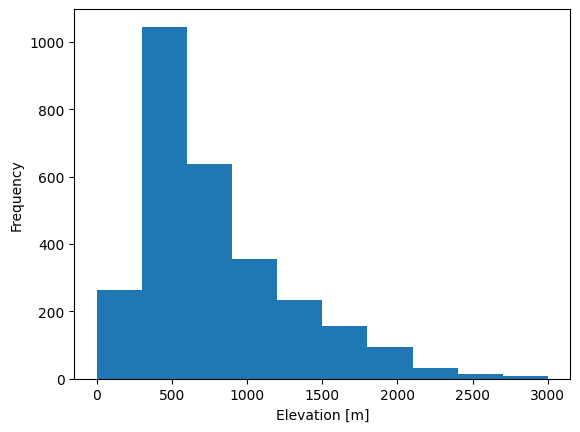

In [19]:
ax = elevation.plot.hist(grid=False)
ax.set_xlabel('Elevation [m]')
ax.set_ylabel('Frequency')
ax.legend().remove()

Get highest and lowest stations by name.

In [20]:
monthly_names_elevations = monthly[['Name', 'Elevation']].drop_duplicates()
monthly_names_elevations

min_elevation_id, max_elevation_id = monthly_names_elevations['Elevation'].idxmin(), monthly_names_elevations['Elevation'].idxmax()

# Release variable
del monthly_names_elevations

min_elevation_id, max_elevation_id

(1219716, 1213452)

In [21]:
min_elevation_name, max_elevation_name = monthly.iloc[min_elevation_id]['Name'], monthly.iloc[max_elevation_id]['Name']
min_elevation_name, max_elevation_name

('Cannes', 'Bellecote_nivose')

Get data for highest and lowest stations.

In [22]:
monthly_min_elevation = monthly[monthly['Name'] == min_elevation_name]
monthly_max_elevation = monthly[monthly['Name'] == max_elevation_name]

monthly_min_elevation = monthly_min_elevation.set_index('date')
monthly_max_elevation = monthly_max_elevation.set_index('date')

Plot snow height.

<AxesSubplot: xlabel='date'>

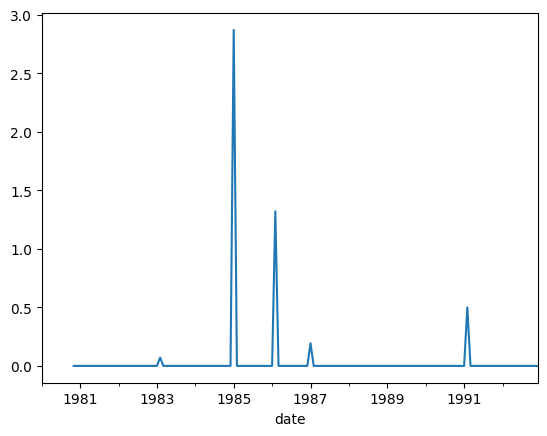

In [23]:
monthly_min_elevation.HSmean.plot()

In [24]:
monthly_max_elevation.HSmean.describe()

count    174.000000
mean     115.109586
std       96.270439
min        0.000000
25%       10.403226
50%      113.667742
75%      190.227823
max      395.548387
Name: HSmean, dtype: float64

Oberstaufen_Steibis


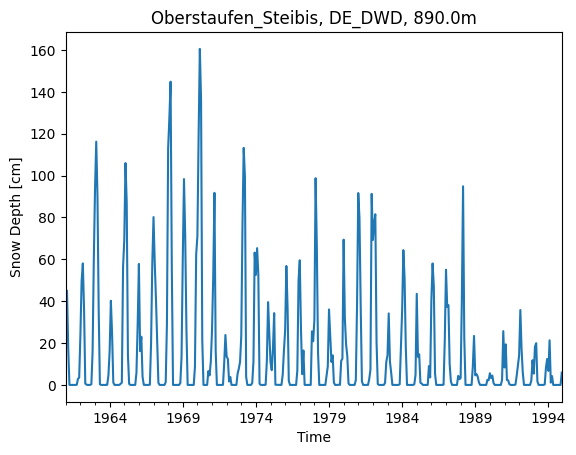

In [25]:
random_name = available_stations.sample(1)
random_name = random_name.values[0]
random_name = "Oberstaufen_Steibis"
#random_name = "Bellecote_nivose"

print(random_name)

random_station_data = monthly[monthly['Name'] == random_name]
random_station_data = random_station_data.set_index('date')
ax = random_station_data['HSmean_gapfill'].plot(xlabel='Time', ylabel='Snow Depth [cm]', title=(random_name + ", " + str(random_station_data.Provider.drop_duplicates().values[0]) + ", " + str(random_station_data.Elevation.drop_duplicates().values[0]) + "m"))
#ax = random_station_data['HNsum'].plot(xlabel='Time', ylabel='Amount of snowfall [cm]', title=(random_name + ", " + str(random_station_data.Provider.drop_duplicates().values[0]) + ", " + str(random_station_data.Elevation.drop_duplicates().values[0]) + "m"))

## FR Monthly

In [26]:
fr_monthly

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
0,Abries_rm,1988,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Abries_rm,1988,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Abries_rm,1988,3,NaN,53.066667,77.0,30.0,30.0,30.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Abries_rm,1988,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Abries_rm,1988,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Villard_de_lans_38548001,2019,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102752,Villard_de_lans_38548001,2019,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102753,Villard_de_lans_38548001,2019,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102754,Villard_de_lans_38548001,2019,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.766667,1.000000,16.0,20.0,17.0,8.0,0.0,0.0,0.0,0.0


In [27]:
fr_monthly_min = fr_monthly[fr_monthly['Name'] == min_elevation_name]
fr_monthly_max = fr_monthly[fr_monthly['Name'] == max_elevation_name]

<AxesSubplot: >

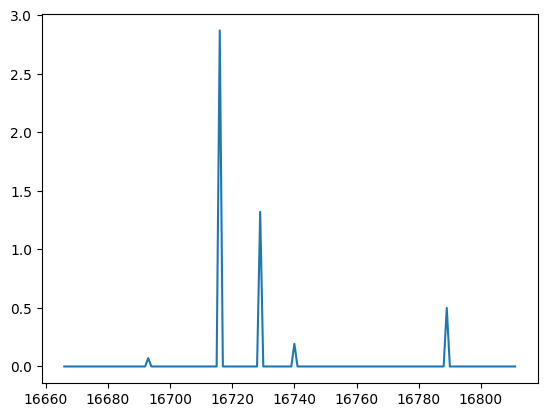

In [28]:
fr_monthly_min.HSmean.plot()

In [29]:
fr_monthly_max

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
10392,Bellecote_nivose,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10393,Bellecote_nivose,1995,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10394,Bellecote_nivose,1995,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10395,Bellecote_nivose,1995,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10396,Bellecote_nivose,1995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,Bellecote_nivose,2019,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10688,Bellecote_nivose,2019,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10689,Bellecote_nivose,2019,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10690,Bellecote_nivose,2019,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## DE Monthly

In [30]:
de_monthly

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
0,Aach,1937,1,NaN,0.161290,5.0,1.0,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Aach,1937,2,NaN,0.857143,10.0,5.0,5.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Aach,1937,3,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Aach,1937,4,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Aach,1937,5,NaN,0.000000,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532747,Zwiefalten,2008,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532748,Zwiefalten,2008,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532749,Zwiefalten,2008,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
532750,Zwiefalten,2008,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.066667,1.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0


In [31]:
print(de_monthly['Name'].drop_duplicates())

0                                Aach
660                 Aalen_Unterkochen
996                Aalen_Unterrombach
1308              Abbach_Bad_Dunzling
1752          Abensberg_Sandharlanden
                     ...             
529656    Ziemetshausen_Seifriedsberg
529932                      Zorneding
530532                      Zugspitze
531960                  Zusmarshausen
532380                     Zwiefalten
Name: Name, Length: 965, dtype: object


In [32]:
de_monthly_bockhorn = de_monthly[de_monthly['Name'] == 'Bockhorn_Oberbayern_Grunbach']
de_monthly_bockhorn

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,HSmean_gapfill,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill
54996,Bockhorn_Oberbayern_Grunbach,1974,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.096774,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
54997,Bockhorn_Oberbayern_Grunbach,1974,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.250000,1.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0
54998,Bockhorn_Oberbayern_Grunbach,1974,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.161290,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
54999,Bockhorn_Oberbayern_Grunbach,1974,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55000,Bockhorn_Oberbayern_Grunbach,1974,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55531,Bockhorn_Oberbayern_Grunbach,2018,8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55532,Bockhorn_Oberbayern_Grunbach,2018,9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55533,Bockhorn_Oberbayern_Grunbach,2018,10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
55534,Bockhorn_Oberbayern_Grunbach,2018,11,6.0,0.700000,6.0,4.0,4.0,0.0,0.0,...,0.700000,0.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0


<AxesSubplot: >

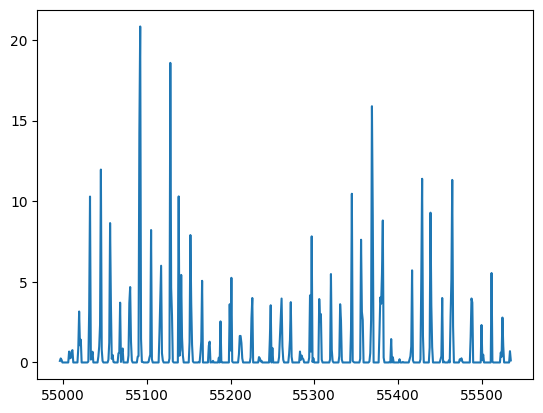

In [33]:
de_monthly_bockhorn['HSmean_gapfill'].plot()

In [34]:
de_monthly_bockhorn = de_monthly_bockhorn.assign(date=pd.to_datetime([f'{y}-{m}' for y, m in zip(de_monthly_bockhorn.year, de_monthly_bockhorn.month)]).values)

start_date = de_monthly_bockhorn['date'].min()
end_date = de_monthly_bockhorn['date'].max()

min_snow = de_monthly_bockhorn['HSmean'].min()
max_snow = de_monthly_bockhorn['HSmean'].max()

r = np.arange(min_snow, max_snow, (max_snow - min_snow) / 10000)

angles = de_monthly_bockhorn['date'].apply(lambda x: ((x.month - 1) / 12) * 2 * np.pi + (x.year - start_date.year) * 2 * np.pi)

#angles
de_monthly_bockhorn

,Name,year,month,HNsum,HSmean,HSmax,SCD1,SCD1gt,SCD10,SCD20,...,frac_gapfilled,HSmax_gapfill,SCD1_gapfill,SCD1gt_gapfill,SCD10_gapfill,SCD20_gapfill,SCD30_gapfill,SCD50_gapfill,SCD100_gapfill,date
54996,Bockhorn_Oberbayern_Grunbach,1974,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1974-01-01
54997,Bockhorn_Oberbayern_Grunbach,1974,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,1974-02-01
54998,Bockhorn_Oberbayern_Grunbach,1974,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,4.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1974-03-01
54999,Bockhorn_Oberbayern_Grunbach,1974,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974-04-01
55000,Bockhorn_Oberbayern_Grunbach,1974,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1974-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55531,Bockhorn_Oberbayern_Grunbach,2018,8,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-08-01
55532,Bockhorn_Oberbayern_Grunbach,2018,9,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-09-01
55533,Bockhorn_Oberbayern_Grunbach,2018,10,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-10-01
55534,Bockhorn_Oberbayern_Grunbach,2018,11,6.0,0.700000,6.0,4.0,4.0,0.0,0.0,...,0.0,6.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,2018-11-01


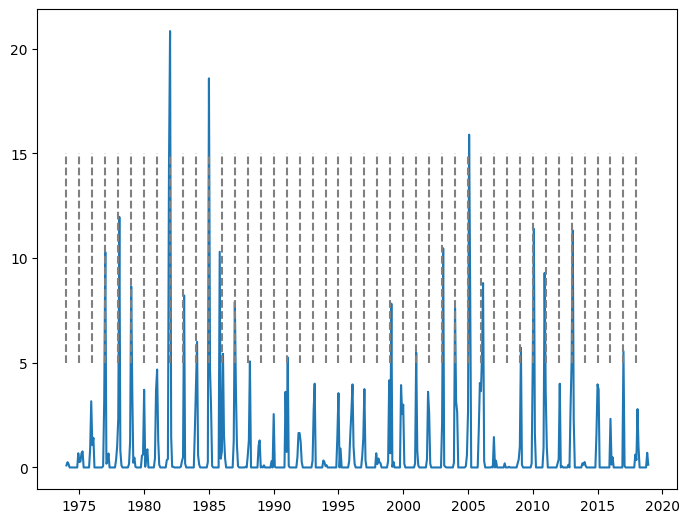

In [35]:
plotdata = de_monthly_bockhorn[['date', 'HSmean_gapfill']]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])

ax.plot(plotdata['date'], plotdata['HSmean_gapfill'])
ax.vlines([i for i in plotdata['date'] if i.month == 1], ymin = 5, ymax = 15, color='grey', ls='--')

display(fig)

plt.close(fig)

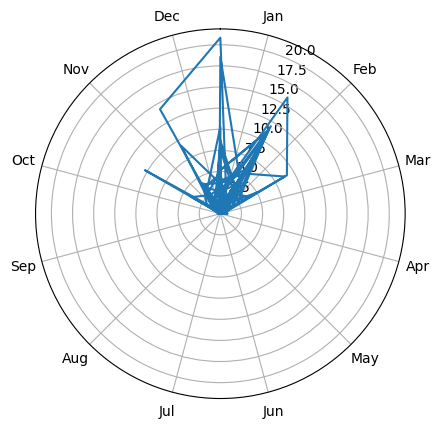

In [36]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

month_angle = 360/12
middles=np.arange(month_angle/2 ,360, month_angle)*np.pi/180

ax.set_xticks(middles)
#ax.set_xticklabels([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.plot(angles, de_monthly_bockhorn['HSmean_gapfill'])

display(fig)

plt.close(fig)

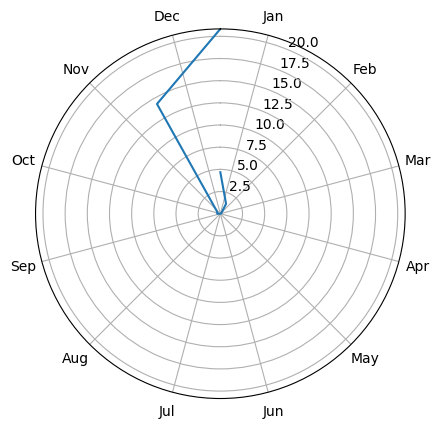

In [37]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

month_angle = 360/12
middles=np.arange(month_angle/2 ,360, month_angle)*np.pi/180

ax.set_xticks(middles)
ax.set_xticklabels([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])

max_snow = de_monthly_bockhorn['HSmean_gapfill'].max()


def draw_year(m):
  ax.cla()
  ax.set_theta_direction(-1)
  ax.set_theta_zero_location('N')
  ax.set_xticks(middles)
  ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
  ax.set_ylim([0, max_snow])

  #ax.axvline(angles[m], color='grey', ls='--')

  ax.plot(angles[m:m+13], de_monthly_bockhorn['HSmean_gapfill'][m:m+13])


draw_year(12 * 7)

anim = FuncAnimation(fig, draw_year, interval=40, frames=len(angles)-12, repeat=False)

#HTML(anim.to_html5_video())

display(fig)

plt.close(fig)

In [38]:
#anim.save('anim.mp4')

In [39]:
#alternative to anim.save('anim.mp4')
#writergif = animation.PillowWriter(fps=120)
#anim.save('anim.gif',writer=writergif)
